In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [4]:
df = pd.read_csv("soil dataset_LOCATION.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label,pin_code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,500001
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,500001
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,500001
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,500001
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,500001
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,700072
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,700072
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,700072
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,700072


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   pin_code     2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'pin_code'],
      dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
 if df[col].dtype in ['int64', 'float64']:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col],  shade=True)
    i+=1
    plt.tight_layout()
plt.show()

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'N': np.random.randn(100),
    'P': np.random.randn(100),
    'K': np.random.randn(100),
    'temperature': np.random.randn(100),
    'humidity': np.random.randn(100),
    'ph': np.random.randn(100),
    'rainfall': np.random.randn(100),
    'label': np.random.randint(2, size=100)  # Example binary label (0 or 1)
}

In [68]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

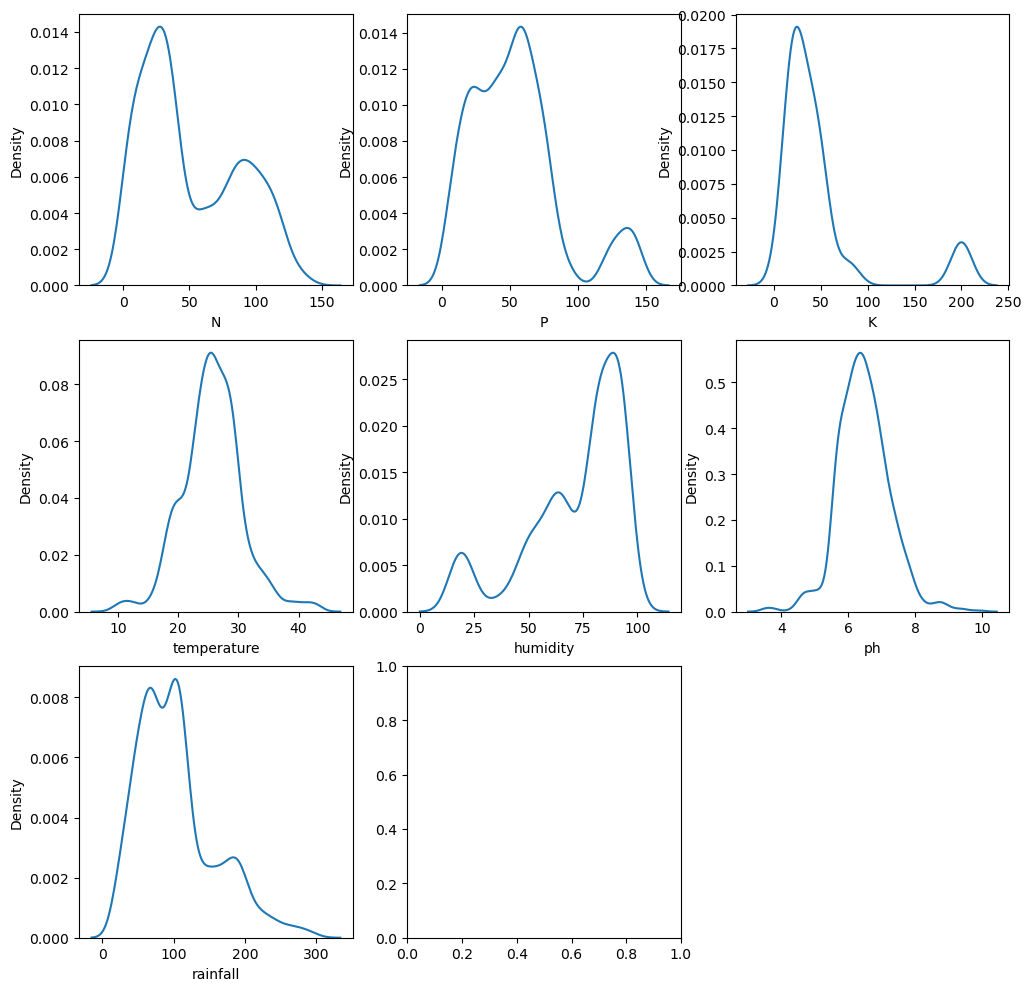

In [20]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
if pd.api.types.is_numeric_dtype(df[col]):
    plt.subplot(3,3,i)
    sns.kdeplot(df[col], shade=True)
    i+=1

In [69]:
df = pd.DataFrame(data)

In [23]:
corr_matrix = df.corr()

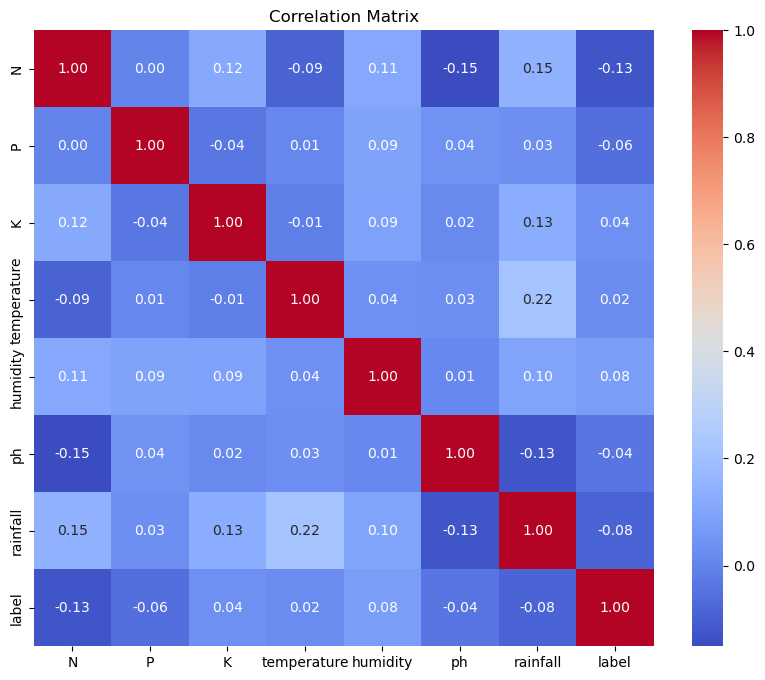

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [25]:
import scipy.stats as sm

In [26]:
df.iloc[:,:-1].skew()

N             -0.097642
P             -0.182733
K              0.523578
temperature    0.105340
humidity       0.211855
ph            -0.101988
rainfall      -0.603343
dtype: float64

In [27]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.475320,-0.193254,-0.552612,1.947845,0.431379,0.377200,-0.285081,0
1,-1.197035,1.480836,-1.241378,-0.797131,0.108129,1.082160,0.170743,0
2,-1.306761,0.959962,-1.096345,0.832422,-0.405562,-1.153689,-0.712279,1
3,0.552015,0.766791,-0.311571,0.212683,0.881478,0.551538,-0.384353,0
4,-1.405777,1.263126,-0.258804,-0.171437,-0.085217,1.075722,-0.146996,0
...,...,...,...,...,...,...,...,...
95,-0.376596,-0.743405,-1.703745,0.738793,-0.760827,0.880380,-1.432925,1
96,-0.192860,0.499485,-1.068054,-0.788885,0.342920,-0.351304,-0.120830,0
97,1.580614,-0.224964,-0.687295,-1.199571,2.122317,-0.972315,-0.388362,1
98,0.340695,0.014260,-0.003856,-2.141332,1.555549,-0.202511,-1.693531,0


In [28]:
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label']) + 1

label_mapping = dict(zip(df['encoded_label'], le.inverse_transform(df['encoded_label'] - 1)))

In [29]:
df['encoded_label']

0     1
1     1
2     2
3     1
4     1
     ..
95    2
96    1
97    2
98    1
99    2
Name: encoded_label, Length: 100, dtype: int64

In [30]:
class_labels = le.classes_
class_labels

array([0, 1])

In [31]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_label
0,0.475320,-0.193254,-0.552612,1.947845,0.431379,0.377200,-0.285081,0,1
1,-1.197035,1.480836,-1.241378,-0.797131,0.108129,1.082160,0.170743,0,1
2,-1.306761,0.959962,-1.096345,0.832422,-0.405562,-1.153689,-0.712279,1,2
3,0.552015,0.766791,-0.311571,0.212683,0.881478,0.551538,-0.384353,0,1
4,-1.405777,1.263126,-0.258804,-0.171437,-0.085217,1.075722,-0.146996,0,1
...,...,...,...,...,...,...,...,...,...
95,-0.376596,-0.743405,-1.703745,0.738793,-0.760827,0.880380,-1.432925,1,2
96,-0.192860,0.499485,-1.068054,-0.788885,0.342920,-0.351304,-0.120830,0,1
97,1.580614,-0.224964,-0.687295,-1.199571,2.122317,-0.972315,-0.388362,1,2
98,0.340695,0.014260,-0.003856,-2.141332,1.555549,-0.202511,-1.693531,0,1


In [32]:
x = df.drop(['label','encoded_label'],axis=1)
y = df['encoded_label']

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['ph'] = scaler.fit_transform(df[['ph']])

df.to_csv('your_normalized_dataset.csv', index=False)

print(df.head())

          N         P         K  temperature  humidity        ph  rainfall  \
0  0.475320 -0.193254 -0.552612     1.947845  0.431379  0.664522 -0.285081   
1 -1.197035  1.480836 -1.241378    -0.797131  0.108129  0.788405  0.170743   
2 -1.306761  0.959962 -1.096345     0.832422 -0.405562  0.395497 -0.712279   
3  0.552015  0.766791 -0.311571     0.212683  0.881478  0.695158 -0.384353   
4 -1.405777  1.263126 -0.258804    -0.171437 -0.085217  0.787274 -0.146996   

   label  encoded_label  
0      0              1  
1      0              1  
2      1              2  
3      0              1  
4      0              1  


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 7)
(10, 7)
(90,)
(10,)


In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[2 3]
 [4 1]]

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.40      0.36         5
           2       0.25      0.20      0.22         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [37]:
rf = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(50,200),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,100),
    'min_samples_split':np.arange(4,100),
    'min_samples_leaf':np.arange(4,100)}

rscv_model = RandomizedSearchCV(rf,param_grid, cv=5)
rscv_model.fit(x_train,y_train)
rscv_model.best_estimator_

RandomForestClassifier(max_depth=18, min_samples_leaf=50, min_samples_split=79,
                       n_estimators=71)

In [50]:
y_pred_train = new_rf_model.predict(x_train)

print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))

Confusion Matrix:
 [[ 0 41]
 [ 0 49]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.54      1.00      0.71        49

    accuracy                           0.54        90
   macro avg       0.27      0.50      0.35        90
weighted avg       0.30      0.54      0.38        90



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
y_test.values[:10]

array([2, 2, 1, 1, 2, 2, 1, 1, 2, 1], dtype=int64)

In [52]:
y_pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [53]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_prediction=rfc.predict(x_test)
accuracy_score=(y_test,y_prediction)
accuracy_score

(36    2
 16    2
 67    1
 79    1
 88    2
 78    2
 44    1
 96    1
 90    2
 4     1
 Name: encoded_label, dtype: int64,
 array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2], dtype=int64))

In [54]:
import json
import pickle
import os

In [55]:
class_labels

array([0, 1])

In [56]:
label_dict = {}
for index, label in enumerate(class_labels):
    label_dict[label] = index

In [57]:
features_data = {'columns': list(x.columns)}

In [58]:
with open('features_data.json', 'w') as file:
    json.dump(features_data, file)

In [59]:
with open('new_rf_model.pickle', 'wb') as file:
    pickle.dump(new_rf_model, file)

In [60]:
num_test_series = 5 

In [61]:
for i in range(num_test_series):
    # Create a test series with zeros
    test_series = pd.Series(np.zeros(len(features_data['columns'])), index=features_data['columns'])

In [62]:
test_series['N'] = 65
test_series['P'] = 37
test_series['K'] = 40
test_series['temperature'] = 23.3
test_series['humidity'] = 71.5
test_series['ph'] = 6.9
test_series['rainfall'] = 102.2

In [63]:
test_series

N               65.0
P               37.0
K               40.0
temperature     23.3
humidity        71.5
ph               6.9
rainfall       102.2
dtype: float64

In [66]:
# Predict probabilities for each class
probabilities = new_rf_model.predict_proba([test_series])[0]

# Create a dictionary to store crop probabilities
crop_probabilities = {}

# Associate each crop label with its probability
for crop_label, probability in zip(class_labels, probabilities):
    crop_probabilities[crop_label] = probability
sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)
threshold = 0.15
recommended_crops = [crop for crop, prob in sorted_crops if prob >= threshold]

print("Recommended Crops:")
for crop in recommended_crops:
    print(crop)

Recommended Crops:
1
0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
pickle.dump(rfc,open('model.pkl','wb'))